# ML Capstone Project

## Housing Price Prediction
Arezoo Tirdad

April 2023

In [161]:
# pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [99]:
# EDA & plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from category_encoders.quantile_encoder import QuantileEncoder

# Modeling
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline


from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

# interpreting the model
from lime.lime_tabular import LimeTabularExplainer

# 1. Objective

The objective is to predict the house prices from a dataset of houses sold in Austin, Texas between 2014 and 2015. 

This dataset, scraped from Zillow, was acquired from Kaggle(link below). It's a regression problem with the labels present. The evaluation metric will be MSE.

    - https://www.kaggle.com/datasets/ericpierce/austinhousingprices

- **zpid**                        Unique Identifier - Zillow Property ID  
- **city**                        The lowercase name of a city or town in or surrounding Austin, Texas. 
- **streetAddress**               The street address of the listing. 
- **zipcode**                     The listing 5-digit ZIP code.  
- **description**                 The description of the listing from Zillow. 
- **latitude**                    Latitude of the listing.
- **longitude**                   Longitude of the listing.
- **propertyTaxRate**             Property Tax Rate for the listing.
- **garageSpaces**                Number of garage spaces. This is a subset of the ParkingSpaces feature.  
- **hasAssociation**              Indicates if there is a Homeowners Association associated with the listing.   
- **hasCooling**                  Boolean indicating if the home has a cooling system.   
- **hasGarage**                   Boolean indicating if the home has a garage.   
- **hasHeating**                  Boolean indicating if the home has a heating system.   
- **hasSpa**                      Boolean indicating if the home has a Spa.   
- **hasView**                     If the home comes with a view, determined by the property lister.   
- **homeType**                    The home type (i.e., Single Family, Townhouse, Apartment). 
- **parkingSpaces**               The number of parking spots that come with a home.  
- **yearBuilt**                   The year the property was built.  
- **latestPrice**                 The most recent available price at time of data acquisition.
- **numPriceChanges**             The number of price changes a home has undergone since being listed.  
- **latest_saledate**             The latest sale date (YYYY-MM-DD). 
- **latest_salemonth**            The month the home sold (1-12).  
- **latest_saleyear**             The year the property sold (2018-2021).  
- **latestPriceSource**           The party that provided the sale price.
- **numOfPhotos**                 The number of photos in the Zillow listing. Only the first photo is included in the homeImages folder.  
- **numOfAccessibilityFeatures**  The number of unique accessibility features in the Zillow listing.  
- **numOfAppliances**             The number of unique appliances in the Zillow listing.  
- **numOfParkingFeatures**        The number of unique parking features in the Zillow listing.  
- **numOfPatioAndPorchFeatures**  The number of unique patio and/or porch features in the Zillow listing.  
- **numOfSecurityFeatures**       The number of unique security features in the Zillow listing.  
- **numOfWaterfrontFeatures**     The number of unique waterfront features in the Zillow listing.  
- **numOfWindowFeatures**         The number of unique window aesthetics in the Zillow listing.  
- **numOfCommunityFeatures**      The number of unique community features (community meeting room, mailbox) in the Zillow listing.  
- **lotSizeSqFt**                 The lot size of the property reported in Square Feet.
- **livingAreaSqFt**              The living area of the property reported in Square Feet.
- **numOfPrimarySchools**         The number of Primary schools listed in the area on the Zillow listing. 
- **numOfElementarySchools**      The number of Elementary schools listed in the area on the Zillow listing.  
- **numOfMiddleSchools**          The number of Middle schools listed in the area on the Zillow listing.  
- **numOfHighSchools**            The number of High schools listed in the area on the Zillow listing.  
- **avgSchoolDistance**           The average distance of all school types (i.e., Middle, High) in the Zillow listing.
- **avgSchoolRating**             The average school rating of all school types (i.e., Middle, High) in the Zillow listing.
- **avgSchoolSize**               The average school size of all school types (i.e., Middle, High) in the Zillow listing.  
- **MedianStudentsPerTeacher**    The median students per teacher for all schools in the Zillow listing.  
- **numOfBathrooms**              The number of bathrooms in a property.
- **numOfBedrooms**               The number of bedrooms in a property.  
- **numOfStories**                The number of stories a property has.  
- **homeImage**                   The name of the first image from the home listing.

# 2. Data
## Collecting Data

In [53]:
df = pd.read_csv('Austin, TX House Listings/austinHousingData.csv')
df.head(3)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...


In [3]:
df.shape

(15171, 47)

In [4]:
df.columns

Index(['zpid', 'city', 'streetAddress', 'zipcode', 'description', 'latitude',
       'longitude', 'propertyTaxRate', 'garageSpaces', 'hasAssociation',
       'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa', 'hasView',
       'homeType', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'latestPriceSource', 'numOfPhotos',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories', 'homeImage'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15171 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

We have **no null values** and **47 features**, out of which 7 are object type, 6 are boolean & the remaining 34 are numeric.

- **Object columns**: city, streetAddress, description, homeType, description, latest_saledate, latestPriceSource & homeImage
- **Boolean columns**: hasAssociation, hasCooling, hasGarage, hasHeating, hasSpa, hasView

## Preprocessing, EDA & Visualization

In [6]:
# Some of the numerical columns
df.describe(include=['int64'])

,zpid,zipcode,garageSpaces,parkingSpaces,yearBuilt,numPriceChanges,latest_salemonth,latest_saleyear,numOfPhotos,numOfAccessibilityFeatures,...,numOfWindowFeatures,numOfCommunityFeatures,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolSize,MedianStudentsPerTeacher,numOfBedrooms,numOfStories
count,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,...,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000
mean,1.044193e+08,78735.932964,1.229187,1.224507,1988.554743,3.032892,6.733043,2019.078241,30.640432,0.012985,...,0.208490,0.018852,0.940676,0.049173,1.035990,0.976798,1237.304660,14.857228,3.440380,1.467273
std,3.179426e+08,18.893475,1.352117,1.352732,21.579458,2.487392,3.146760,0.813941,21.175174,0.179438,...,0.488331,0.206775,0.236516,0.234937,0.263633,0.292043,326.513311,1.741857,0.849942,0.523697
min,2.858495e+07,78617.000000,0.000000,0.000000,1905.000000,1.000000,1.000000,2018.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,396.000000,10.000000,0.000000,1.000000
25%,2.941115e+07,78727.000000,0.000000,0.000000,1974.000000,1.000000,4.000000,2018.000000,20.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,966.000000,14.000000,3.000000,1.000000
50%,2.949441e+07,78739.000000,1.000000,1.000000,1993.000000,2.000000,7.000000,2019.000000,29.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1287.000000,15.000000,3.000000,1.000000
75%,7.033762e+07,78749.000000,2.000000,2.000000,2006.000000,4.000000,9.000000,2020.000000,39.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1496.000000,16.000000,4.000000,2.000000
max,2.146313e+09,78759.000000,22.000000,22.000000,2020.000000,23.000000,12.000000,2021.000000,179.000000,8.000000,...,4.000000,8.000000,2.000000,2.000000,3.000000,2.000000,1913.000000,19.000000,20.000000,4.000000


 - zpid is Zillow property id. We have 15171 rows, let's check if they're all unique listings. If they are, we can drop the column later.
 - There are a lot of outliers in columns garageSpaces, parkingSpaces, numPriceChanges, numOfBedrooms.
 - Buildings' yearBuilt span from 1905 to 2020, with average of 1988(making half of the buildings less than 35 years old), **seems normally distributed but let's check.**
 - There are a lot of information about schools which is typically a factor for a lot of people. There aren't many elementary schools but it's compensated by middle and high schools. So, number of elementary school may be an important feature.
 - avgSchoolSize & avgSchoolRating seem **normally distributed**. Average distance to a school is about 2 miles so not walking distance. It may mean it can be a good driving factor on price.
 - On average, listings have 3 bedrooms.

In [7]:
# rest of numerical columns
df.describe(include=['float64'])

,latitude,longitude,propertyTaxRate,latestPrice,lotSizeSqFt,livingAreaSqFt,avgSchoolDistance,avgSchoolRating,numOfBathrooms
count,15171.000000,15171.000000,15171.000000,1.517100e+04,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000
mean,30.291596,-97.778532,1.994085,5.127677e+05,1.190840e+05,2208.323314,1.838495,5.779912,2.683010
std,0.096973,0.084715,0.053102,4.531853e+05,1.225272e+07,1378.576119,1.068376,1.860276,1.054445
min,30.085030,-98.022057,1.980000,5.500000e+03,1.000000e+02,300.000000,0.200000,2.333333,0.000000
25%,30.203313,-97.838009,1.980000,3.090000e+05,6.534000e+03,1483.000000,1.100000,4.000000,2.000000
50%,30.284416,-97.769539,1.980000,4.050000e+05,8.276000e+03,1975.000000,1.566667,5.778694,3.000000
75%,30.366585,-97.717903,1.980000,5.750000e+05,1.089000e+04,2687.000000,2.266667,7.000000,3.000000
max,30.517323,-97.569504,2.210000,1.350000e+07,1.508483e+09,109292.000000,9.000000,9.500000,27.000000


 - PropertyTaxRate seems relatively consistant across all listings.
 - There are a lot of outliers in columns numOfBathrooms, lotSizesSqFt, livingAreaSqFt.
 - Price span from 5,500 to 13,500,000 with average of 512,700. There must be **some outliers** which is expected but we should investigate.
 - There are listings with 0 numOfBathrooms which is suspicious as it's a building code issue, let's check them.
 - lotSizeSqFt spans from 100 to 1,508,482,800 sqft & average of 119,083.(let's investigate both highest amount & lowest)
 - livingAreaSqFt spans from 300 to 109,292 sqft & average of 2,208. (the 300 seems too low, also we should investigate the high numbers)
 - On average, listings have 2 to 3 bathrooms.

In [8]:
# Boolean columns
df.describe(include=['bool'])

,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView
count,15171,15171,15171,15171,15171,15171
unique,2,2,2,2,2,2
top,True,True,True,True,False,False
freq,8007,14897,8346,15022,13972,11716


 - Most of listings have both heating and cooling so shouldn't be an important feature but hasAssociation & hasGarage are almost half/half. 
 - We have to check how much hasView changes the price too.

**So far, Key features assumed to drive up the price are:**
- yearBuilt, livingAreaSqFt, lotSizeSqFt, avgSchoolDistance, avgSchoolRating, numOfElementarySchools,(numOfBedrooms, numOfBathrooms), hasGarage, hasView, hasAssociation

#### A quick look at categorical columns

In [9]:
df.describe(include=['O'])

,city,streetAddress,description,homeType,latest_saledate,latestPriceSource,homeImage
count,15171,15171,15171,15171,15171,15171,15171
unique,9,15164,15133,10,958,225,15171
top,austin,10816 Mickelson Dr,Coming soon! Photos and details will be availa...,Single Family,2019-06-28,Agent Provided,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
freq,15020,2,12,14241,68,10486,1


In [10]:
df['homeType'].value_counts(normalize=True)
# Most of the listings are Single Family homes. It'll be more logical to have different price prediction models for different
# building types(e.g. lot area of a single family house has a complete different meaning from lot size of a condo) 
# In this notebook, because most of our listings are Single Family homes(94%), we're going to filter out everything else.
# Removing these other types may also help with our outlier problem. Rows with high number of bedroom or bathrooms may very well
# be for these other types like multiFamily or Apartments.

Single Family            0.938699
Condo                    0.030980
Townhouse                0.011469
Multiple Occupancy       0.006328
Vacant Land              0.005471
Residential              0.002439
Apartment                0.002439
Mobile / Manufactured    0.001121
MultiFamily              0.000659
Other                    0.000395
Name: homeType, dtype: float64

In [11]:
df['city'].value_counts()
# we can change the column to a boolean to just answer if it's in proper Austin or alternatively not consider the column at all.

austin              15020
del valle              86
pflugerville           36
driftwood              12
manor                   6
dripping springs        5
manchaca                3
west lake hills         2
road                    1
Name: city, dtype: int64

In [12]:
df['streetAddress'].str.extract(r'(?P<street_name>\s(?:[a-zA-Z0-9]\s*)+)').value_counts()
# There are 6,263 different streets.
# We have to figure out a way for addressing the location factor...

street_name      
 Shoal Creek Blvd    22
 Mesa Verde Dr       20
 Canyon Glen Cir     19
 Big View Dr         19
 Parkfield Dr        19
                     ..
 Palmwood Cv          1
 Palo Blanco Ln       1
 E 17th St            1
 Palo Duro Rd         1
 Laurel Hill Cv       1
Length: 6263, dtype: int64

In [13]:
# Column latest_saledate is an object type, we also have columns for month and year.
# We can analyze them but have to drop them because this information will not be available when the model is going to predict later
df[['latest_saledate', 'latest_salemonth', 'latest_saleyear']].head()

,latest_saledate,latest_salemonth,latest_saleyear
0,2019-09-02,9,2019
1,2020-10-13,10,2020
2,2019-07-31,7,2019
3,2018-08-08,8,2018
4,2018-10-31,10,2018


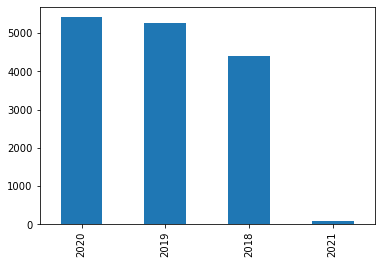

In [14]:
df['latest_saleyear'].value_counts().plot(kind='bar');

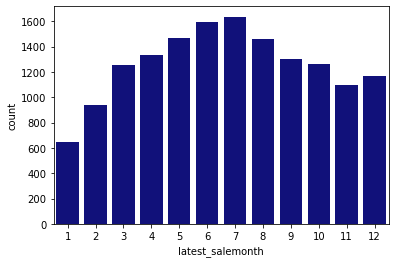

In [15]:
sns.countplot(data=df, x='latest_salemonth', color='darkblue');

In [212]:
# What is the distribution of numerical values across our dataset?
from pandas_profiling import ProfileReport
# ProfileReport(df)

In [16]:
# Are all zpid unique? if so, we can drop the column.
df['zpid'].nunique()

15171

### Filtering DataFrame to Single Family & some of the preprocessing in one cell
Before we check the distribution of individual columns, let's filter out homeType to include only Single Family houses. Also, we'll be dropping some of the unnecessary columns.

In [54]:
# Filtering
df = df[df['homeType'] == 'Single Family']

# replacing column 'city' with a boolean feature(in_austin)
df['in_austin'] = df['city'].mask(df['city'] != 'austin', False).map({False:0, 'austin':1})

# mapping boolean columns to 0 & 1
df['hasAssociation'] = df['hasAssociation'].astype(int)
df['hasCooling'] = df['hasCooling'].astype(int)
df['hasHeating'] = df['hasHeating'].astype(int)
df['hasGarage'] = df['hasGarage'].astype(int)
df['hasSpa'] = df['hasSpa'].astype(int)
df['hasView'] = df['hasView'].astype(int)

# Getting a building_age from yearBuilt
df['buildingAge'] = 2023 - df['yearBuilt']

# Dropping columns
df = df.drop(columns=['zpid', 'homeImage', 'latestPriceSource', 'numOfPhotos', 'latest_saledate', 'latest_salemonth', 
                      'latest_saleyear', 'city', 'homeType'])

# Adding a column for street name
# df['street'] = df['streetAddress'].str.extract(r'(?P<street_name>\s(?:[a-zA-Z0-9]\s*)+)')

In [55]:
df.shape

(14241, 40)

average price is 516387.88


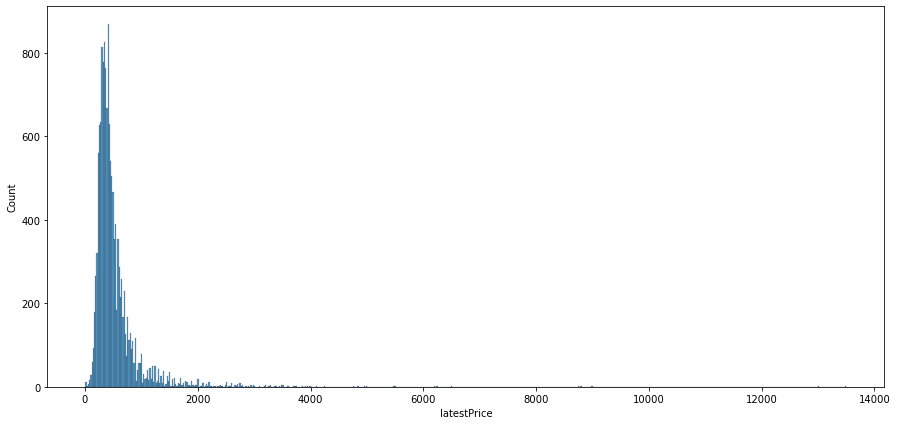

In [19]:
# What is the distribution of latestPrice?
print('average price is {}'.format(round(df['latestPrice'].mean(), 2)))
plt.figure(figsize=[15,7])
sns.histplot(x=df['latestPrice']/1000);

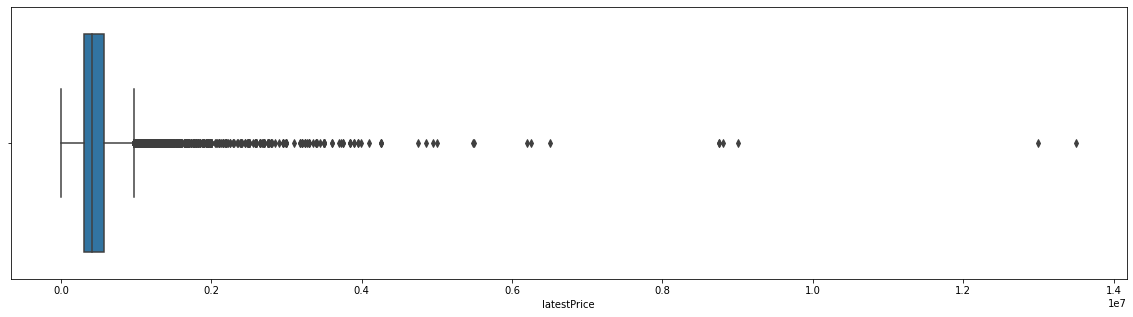

In [21]:
plt.figure(figsize=[20,5])
sns.boxplot(data=df, x='latestPrice');
# There are a lot of outliers in price(mostly luxury properties). Our model won't be able to predict for these houses
# Better way would be to train a different model for these houses but first let's see how many are above the top whisker

In [22]:
q1 , q3 = df['latestPrice'].quantile([0.25,0.75])
iqr = q3 - q1
top_boundary = q3 + (1.5*iqr)
top_boundary

972500.0

In [23]:
df['latestPrice'].quantile([0,0.93])
# 7% of listings fall above the top whisker. We'll be limiting our data to listings below the top_boundary before building our model

0.00      5500.0
0.93    980000.0
Name: latestPrice, dtype: float64

In [24]:
len(df[df['latestPrice'] > 972500])

1035

In [25]:
# some of the most expensive properties.
df[['lotSizeSqFt', 'livingAreaSqFt', 'latestPrice', 'streetAddress', 'zipcode']][df['latestPrice'] > 5000000]
# These are the top 4 most expensive zipcodes in our dataset. 

,lotSizeSqFt,livingAreaSqFt,latestPrice,streetAddress,zipcode
59,24829.2,8800.0,5495000.0,14515 Ridgetop Ter,78732
193,116305.2,7740.0,5474997.0,14624 Flat Top Ranch Rd,78732
290,87120.0,7745.0,8999000.0,2105 Island Wood Rd,78733
1298,204296.4,9210.0,8750000.0,5401 Maryanna Dr,78746
1360,257004.0,11622.0,6200000.0,14300 Flat Top Ranch Rd,78732
2316,710899.2,15394.0,13500000.0,12400 Cedar St,78732
14275,10454.0,4441.0,13000000.0,5909 Lookout Mountain Dr,78731
14376,79714.8,6046.0,8750000.0,4902 Tortuga Pl,78731
14395,48787.2,7904.0,6499000.0,4406 Island Cv,78731
14627,37026.0,5775.0,6250000.0,3811 Westlake Dr,78746


In [26]:
q1 - (1.5*iqr)

-87500.0

In [519]:
q1

310000.0

In [27]:
# let's have a look at the low end of price
df[['lotSizeSqFt', 'livingAreaSqFt', 'latestPrice', 'streetAddress', 'zipcode']][df['latestPrice'] < 150000] \
.sort_values(by='latestPrice')
# Many of the prices below don't seem to have legitimate prices(they may be transfers between family members or simply wronge 
# input). Even for properties priced at 150k, estimated price on most platforms is more than 350k
# I'll be dropping all. I'd assume there are more listings like these but we won't be able to accurately identify them.

,lotSizeSqFt,livingAreaSqFt,latestPrice,streetAddress,zipcode
844,9060.0,4094.0,5500.0,3302 Blue Jay Ln,78732
5796,14374.8,6000.0,5600.0,1812 Eagles Glen Cv,78732
785,16117.2,4979.0,5800.0,7109 Greenshores Dr,78730
9310,6734.0,2330.0,6000.0,1907 Holly St,78702
13184,10005.0,2693.0,6300.0,1500 Hartford Rd,78703
...,...,...,...,...,...
3873,7840.0,1362.0,149900.0,5714 Shreveport Dr,78727
11287,5227.0,2350.0,149900.0,934 E 50th St,78751
12031,4617.0,1279.0,149983.0,1613 Sir Thopas Trl,78748
12115,10890.0,1501.0,149990.0,10215 Bilbrook Pl,78748


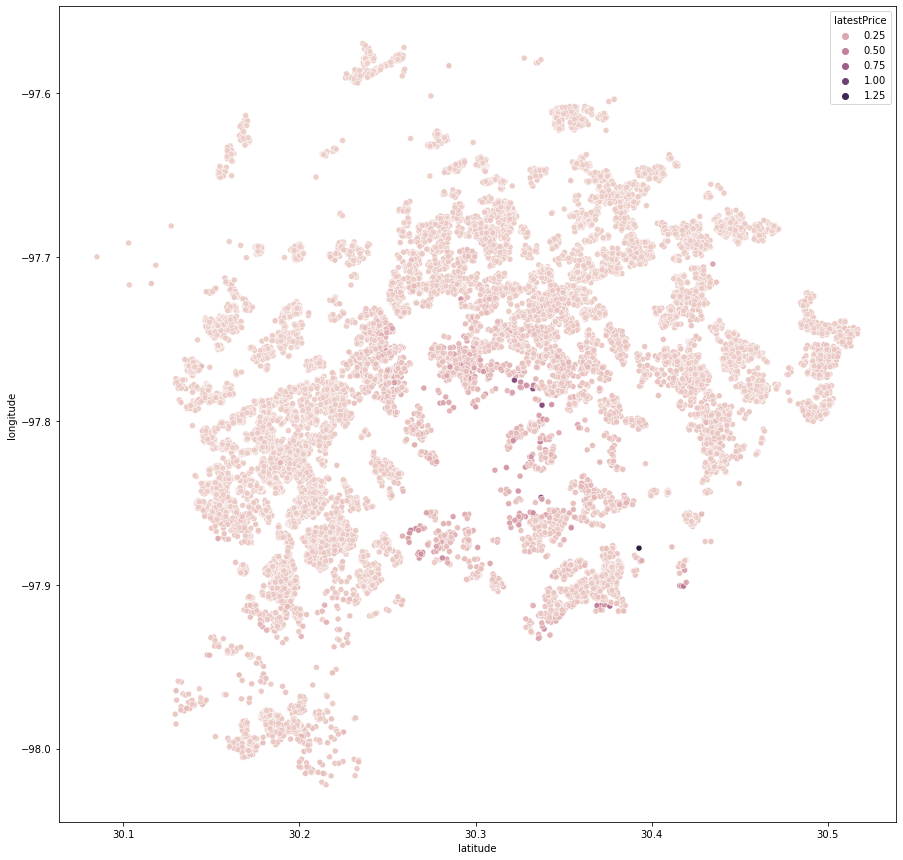

In [28]:
# plotting a map of listings using latitude & longitude numbers
plt.figure(figsize=[15,15])
sns.scatterplot( x=df['latitude'], y=df['longitude'], hue=df['latestPrice']);

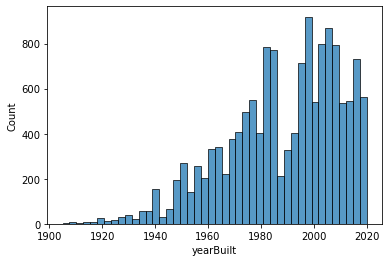

In [29]:
# What is the distribution of yearBuilt?
# Looking at yearBuilt, most of buildings are built after 1980 and we can see listings are not of very old buildings
sns.histplot(df['yearBuilt']);

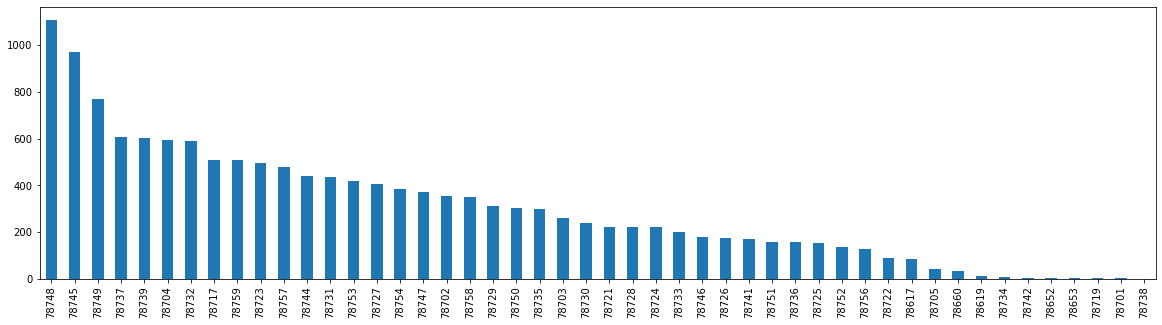

In [30]:
# Distribution of zipcode?
# more important is how zipcode is related to price, let's get average price for each zipcode and show it that way
df['zipcode'].value_counts().plot(kind='bar', figsize=[20,5]);

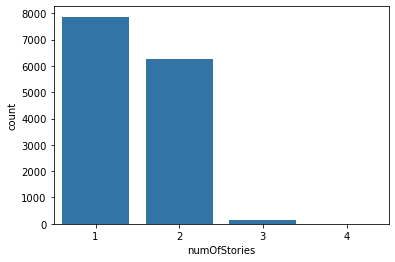

In [31]:
# Distribution of numOfStorie?
sns.countplot(x=df['numOfStories'], color='#1f77b7');
# df['numOfStories'].value_counts().plot(kind='bar');

#### number of garage spaces

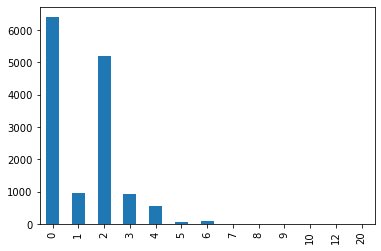

In [32]:
# Distribution of number of parking spaces
# There isn't much difference between number of garage and parking spaces, we'll be going forward with number of garage as it 
# implies a covered area that can be more desirable
df['garageSpaces'].value_counts().sort_index().plot(kind='bar');
# let's check listings with the highest number of parking spaces

In [256]:
df[['streetAddress', 'lotSizeSqFt', 'latestPrice', 'garageSpaces', 'parkingSpaces', 'numOfParkingFeatures']] \
[df['garageSpaces'] > 10]
# 5 out of the 6 results below are wronge input. There are either number of parking space or completely off, my intuition is this
# is the case for most of the high numbers. We better use threshold capping or not use the column at all
# numOfParkingFeatures seems more reasonable

,streetAddress,lotSizeSqFt,latestPrice,garageSpaces,parkingSpaces,numOfParkingFeatures
4533,13100 Rooster Springs Rd,337590.000,824900.000,20,20,3
4777,3301 Barton Creek Blvd,68824.800,1595000.000,12,12,3
6805,7600 Elm Forest Rd,27007.200,525000.000,12,12,1
6985,6907 Cherrydale Dr,7927.000,328000.000,12,12,2
9240,908 Keith Ln,20908.800,3400000.000,12,12,4
11108,1405 Berkshire Dr,7797.000,500000.000,12,12,2


In [255]:
df[['streetAddress', 'livingAreaSqFt', 'lotSizeSqFt', 'latestPrice', 'garageSpaces', 'parkingSpaces', 'numOfParkingFeatures']] \
[df['garageSpaces'] == 0].head()
# 6405 of the listings show 0 garageSpace. I checked the 5 below & all are wronge input, will be dropping the column

,streetAddress,livingAreaSqFt,lotSizeSqFt,latestPrice,garageSpaces,parkingSpaces,numOfParkingFeatures
2,1408 Fort Dessau Rd,1478.000,7840.000,256125.000,0,0,1
4,15005 Donna Jane Loop,2132.000,6708.000,239900.000,0,0,1
6,14009 Cantata Ln,2432.000,12196.800,315000.000,0,0,1
7,15009 Drusillas Dr,1422.000,5140.000,219900.000,0,0,1
8,1104 Traci Michelle Dr,1870.000,3811.000,225000.000,0,0,1


#### Distribution of number of bedrooms and bathrooms

In [33]:
# distribution of number of bathrooms, we need to check listings with 0 and also very hight numbers
df['numOfBathrooms'].value_counts().sort_index()

0.00       21
1.00      869
1.50        9
1.70        1
1.75        3
2.00     5812
2.50      115
2.75        2
3.00     4931
3.50       44
4.00     1804
4.50        5
5.00      392
5.50        2
6.00      150
6.50        1
7.00       60
8.00       11
9.00        2
10.00       5
13.00       1
27.00       1
Name: numOfBathrooms, dtype: int64

In [34]:
df[['numOfBathrooms', 'livingAreaSqFt', 'latestPrice', 'streetAddress', 'zipcode', 'numOfParkingFeatures']][df['numOfBathrooms'] > 10]
# The listing with 27 bathrooms is actually 3 bathrooms so will be imputating it, the other one is correct

,numOfBathrooms,livingAreaSqFt,latestPrice,streetAddress,zipcode,numOfParkingFeatures
2316,13.0,15394.0,13500000.0,12400 Cedar St,78732,2
2838,27.0,2137.0,745000.0,4212 Far West Blvd,78731,2


In [56]:
# listings with 0 bathroom, these can be imputated with a number proportional to number of bedrooms
# Same thing for listings with 0 bedrooms(cross-referenced & all seem to be either no number shown or wronge input)
df[['numOfBathrooms', 'numOfBedrooms', 'livingAreaSqFt', 'latestPrice', 'streetAddress', 'zipcode']][df['numOfBathrooms'] == 0]
# 21 listings

,numOfBathrooms,numOfBedrooms,livingAreaSqFt,latestPrice,streetAddress,zipcode
705,0.0,5,109292.0,385000.0,201 Marly Way,78733
1842,0.0,0,3809.0,895000.0,10640 Senna Hills Dr,78733
2223,0.0,4,3423.0,850000.0,5138 Mansfield View Ct,78732
2557,0.0,1,29440.0,829000.0,9704 Saugus Ln,78733
3328,0.0,3,1904.0,219999.0,604 W Grady Dr,78753
3852,0.0,5,1956.0,238000.0,11906 Doubloon Cv,78759
4464,0.0,4,2232.0,409900.0,200 Lexington Dr,78737
4491,0.0,4,2557.0,342400.0,348 Drury Ln,78737
6252,0.0,5,5187.0,949000.0,2005 Real Catorce,78746
6646,0.0,0,1660.0,450000.0,8604 Oak Ledge Dr,78748


In [36]:
# 10 listings with 0 bedrooms
df[['numOfBathrooms', 'numOfBedrooms', 'livingAreaSqFt', 'latestPrice', 'streetAddress', 'yearBuilt']] \
    [df['numOfBedrooms'] == 0]

,numOfBathrooms,numOfBedrooms,livingAreaSqFt,latestPrice,streetAddress,yearBuilt
1842,0.0,0,3809.0,895000.0,10640 Senna Hills Dr,2011
5098,3.0,0,1396.0,298900.0,8904 Creekmont Cv,1983
6646,0.0,0,1660.0,450000.0,8604 Oak Ledge Dr,1971
8607,2.0,0,2400.0,525000.0,4201 Del Robles Dr,1982
8759,2.0,0,1085.0,234000.0,2320 Klattenhoff Dr,1984
9685,1.0,0,526.0,349000.0,1187 Coleto St,1929
10006,2.0,0,1096.0,430000.0,1413 Perez St,1930
11894,0.0,0,864.0,400000.0,409 W Odell St,1947
13601,2.0,0,2527.0,469000.0,7224 Moon Rock Rd,2007
14972,1.0,0,864.0,420000.0,1902 Justin Ln,1951


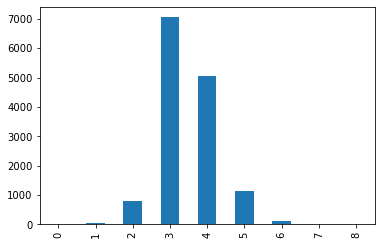

In [37]:
df['numOfBedrooms'].value_counts().sort_index().plot(kind='bar');

#### Looking deeper into feature 'Lot Sizes'

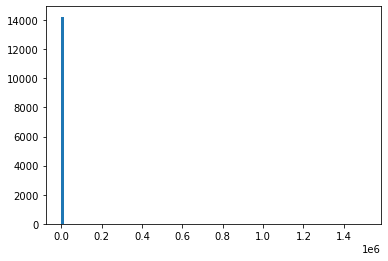

In [38]:
# What is the distribution of lotSizeSqFt?
plt.hist(df['lotSizeSqFt']/1000, bins=100);
# we have to decide how to handle outliers which are listings with very big lots

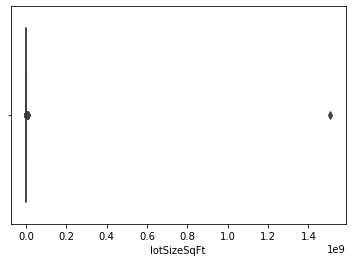

In [39]:
sns.boxplot(data=df, x='lotSizeSqFt');

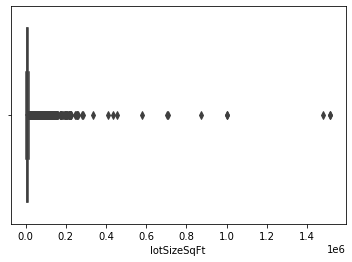

In [61]:
sns.boxplot(data=df, x='lotSizeSqFt');

In [40]:
df['lotSizeSqFt'].quantile(q=0.75)
# 75% of the listings has lots less than 0.25 acres(eg.70x155), so most of listings have a relatively urban scale lots with few
# that are much bigger

10890.0

In [41]:
print('There are', len(df[df['lotSizeSqFt'] > 43560]), 'listings with more than 1 acre in lot size.')
# There are 477 listings(3.3%) with lot areas equal to or more than 1 acre 

There are 477 listings with more than 1 acre in lot size.


In [42]:
df['lotSizeSqFt'].describe().apply(lambda x: format(x, 'f'))

count         14241.000000
mean         121761.473955
std        12641347.597454
min             113.000000
25%            6621.000000
50%            8319.000000
75%           10890.000000
max      1508482800.000000
Name: lotSizeSqFt, dtype: object

In [43]:
# Let's look at the listing with the highest lot area, these are listings with lots bigger than 10 acres
df[['lotSizeSqFt', 'livingAreaSqFt', 'latestPrice', 'streetAddress']][df['lotSizeSqFt'] > 435600] \
.sort_values(by='lotSizeSqFt', ascending = False)
# All the indices above 4600(301 Stone View Trl) are wrong. It seems either a wrong input or miscalculation 
# when the lot area shown was acre.

,lotSizeSqFt,livingAreaSqFt,latestPrice,streetAddress
14654,1.508483e+09,3328.0,1650000.0,3200 W 35th St
2340,8.712000e+06,3183.0,569000.0,4304 Front Range Ln
4635,8.581320e+06,4459.0,999500.0,201 Charismatic Pl
8071,5.967720e+06,1217.0,225000.0,16819 Village Oak Loop
3549,5.902380e+06,1166.0,435000.0,1705 Barbara St
869,5.880600e+06,3688.0,599900.0,14216 Tyburn Trl
1703,2.988216e+06,2655.0,439900.0,689 Wild Rose Dr
1610,2.988216e+06,2095.0,379900.0,910 Wild Rose Dr
10861,2.178000e+06,1793.0,188673.0,2216 Buffalo Tundra Dr
4569,1.516324e+06,2819.0,325000.0,223 Limestone Trl


In [44]:
# Checked all house with less than 1000 sq.ft lot size and all 6 seem to be wronge so I'll be dropping them
df[['lotSizeSqFt', 'livingAreaSqFt', 'latestPrice', 'streetAddress', 'zipcode']][df['lotSizeSqFt'] < 1000] \
.sort_values(by=['lotSizeSqFt'], ascending=False)

,lotSizeSqFt,livingAreaSqFt,latestPrice,streetAddress,zipcode
977,435.0,1753.0,342000.0,854 Wild Rose Dr,78737
6122,435.0,1961.0,669500.0,2604 Sutherland St,78746
10598,435.0,1104.0,500000.0,407 Post Road Dr,78704
8959,392.0,1474.0,271860.0,2004 Tasmanian Tiger Trce,78728
10475,117.0,2172.0,457000.0,209 Starbright Dr,78745
11989,113.0,1245.0,305000.0,9715 Holly Springs Dr,78748


#### Looking deeper into feature 'Living Area'

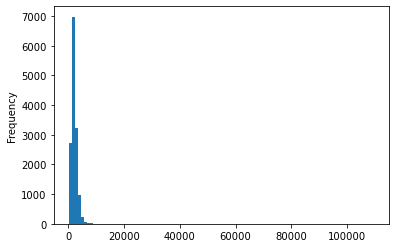

In [45]:
# What is the distribution of livingAreaSqFt?
df['livingAreaSqFt'].plot(kind='hist', bins=100);

In [46]:
df['livingAreaSqFt'].quantile(q=0.95)
# 95% of listings have 4,000 sqft or less living area which seems typical of an urban scale house

4060.0

In [59]:
# These are the top 10 listings with the highest living area. Only the first top 2 seem to be typo so I'll be dropping them.
# indexs: 705 & 2557 
df[['lotSizeSqFt', 'livingAreaSqFt', 'latestPrice', 'streetAddress']][df['livingAreaSqFt'] > 10000] \
.sort_values(by=['livingAreaSqFt'], ascending=False)

,lotSizeSqFt,livingAreaSqFt,latestPrice,streetAddress
705,109335.6,109292.0,385000.0,201 Marly Way
2557,103237.2,29440.0,829000.0,9704 Saugus Ln
2316,710899.2,15394.0,13500000.0,12400 Cedar St
5328,138956.4,14091.0,2700000.0,3509 Lost Creek Blvd
375,116740.8,13731.0,4950000.0,14800 Flat Top Ranch Rd
4753,199940.4,11871.0,2190000.0,7702 Sandia Loop
1360,257004.0,11622.0,6200000.0,14300 Flat Top Ranch Rd
2547,82328.4,11581.0,2795000.0,305 Marly Way
613,43560.0,10611.0,2750000.0,9113 Camelback Dr
4882,454330.8,10011.0,4850000.0,4429 Mirador Dr


In [49]:
# Below are the listings with the lowest living area. 300 sq.ft seems too low but checked google map & other platforms & they 
# seem correct. 300 is the area of two cabins on a very big lot on waterfront 
df[['lotSizeSqFt', 'livingAreaSqFt', 'latestPrice', 'streetAddress', 'zipcode']][df['livingAreaSqFt'] < 500] \
.sort_values(by=['livingAreaSqFt'], ascending=False)

,lotSizeSqFt,livingAreaSqFt,latestPrice,streetAddress,zipcode
9481,2178.0,492.0,289000.0,1902 1/2 Garden St,78702
10049,7405.0,492.0,195000.0,3706 Commerce St,78721
9892,21344.4,488.0,125000.0,1148 Webberville Rd,78721
9338,8232.0,480.0,395000.0,1806 Riverview St,78702
9482,2744.0,468.0,319900.0,1214 Holly St,78702
10230,1481.0,466.0,169900.0,804 Northwestern Ave,78702
3518,11761.2,306.0,139000.0,404 Primrose St,78753
1170,23522.4,300.0,850000.0,3003 Brass Buttons Trl,78734


### Dropping/correcting all the wronge rows in one cell

In [60]:
df = df.drop(columns=['garageSpaces', 'parkingSpaces'])

# Living area outliers(due to wronge input):
df = df.drop(index=[705, 2557])

# Lot Areas shown as less than 1000 sq.ft or more than 35 acres
df = df.drop(df[df['lotSizeSqFt'] >= 1520000].index | df[df['lotSizeSqFt'] < 1000].index)

# number of bathrooms:
# this listing showed 27 bathroom when it's 3 in reality
df['numOfBathrooms'].loc[2838] = 3
# for now we'll drop listings with 0 bathrooms
df = df.drop(df[df['numOfBathrooms'] == 0].index)

# Dropping rows that show 0 bedrooms. I'll imputate listings with 0 bathrooms during modeling
df = df[df['numOfBedrooms'] != 0]

# Dropping listings with prices less than 150k
df = df.drop(df[df['latestPrice'] < 150000].index)

df.shape

C:\Users\arezo\AppData\Local\Temp\ipykernel_27892\3137968469.py:7: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  df = df.drop(df[df['lotSizeSqFt'] >= 1520000].index | df[df['lotSizeSqFt'] < 1000].index)
C:\Users\arezo\AppData\Local\Temp\ipykernel_27892\3137968469.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['numOfBathrooms'].loc[2838] = 3


(14016, 38)

### Checking correlation between price & features

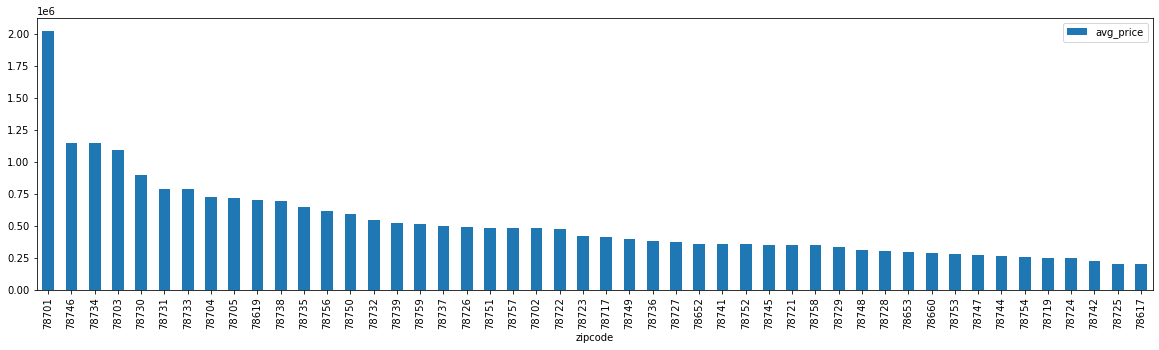

In [39]:
# with zipcode
avg_price_zipcode = pd.DataFrame(df.groupby('zipcode')['latestPrice'].median()).rename(columns={'latestPrice':'avg_price'})
avg_price_zipcode.sort_values(by='avg_price', ascending=False).plot(kind='bar', figsize=[20,5]);

In [379]:
avg_price_zipcode.describe()
# We'll be using target encoding during modeling phase which will address how desirable the location of the listing is

,avg_price
count,48.000
mean,517705.333
std,326883.046
min,199850.000
25%,312425.000
50%,411000.000
75%,621856.250
max,2022000.000


In [41]:
df[['lotSizeSqFt', 'livingAreaSqFt', 'latestPrice', 'streetAddress', 'yearBuilt']][df['yearBuilt'] == 1934]

,lotSizeSqFt,livingAreaSqFt,latestPrice,streetAddress,yearBuilt
9265,15681.6,3649.0,1995000.0,2213 E Windsor Rd,1934
9407,2268.0,960.0,450000.0,66 Navasota St,1934
9511,7535.0,1465.0,699000.0,1305 Holly St,1934
10081,2540.0,700.0,319900.0,2513 E 9th St,1934
11297,9844.0,1008.0,549500.0,4805 Avenue H,1934
11327,7318.0,3064.0,1150000.0,4517 Avenue H,1934
14729,11761.2,4420.0,2175000.0,1513 Northwood Rd,1934
14758,6708.0,1179.0,535000.0,4528 Avenue D,1934


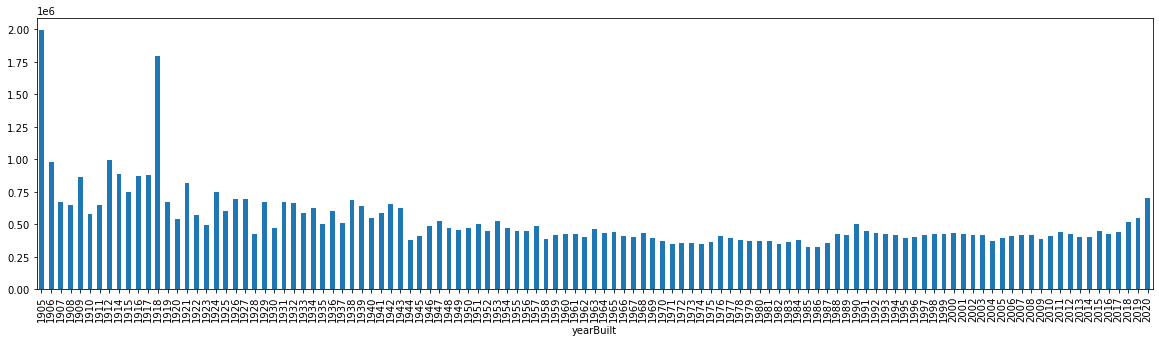

In [44]:
# with yearBuilt
df.groupby('yearBuilt')['latestPrice'].median().plot(kind='bar', figsize=[20,5]);
# highest bars(for 1905 & 1918) only have 1 listing. We have to do binning to get a more accurate picture

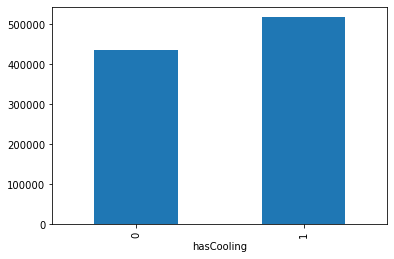

In [451]:
# with hasCooling:
df.groupby('hasCooling')['latestPrice'].mean().plot(kind='bar');

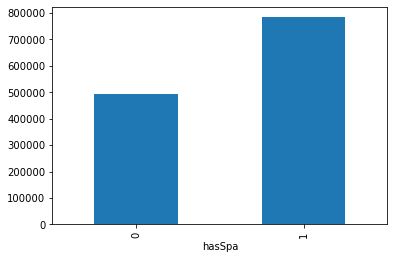

In [19]:
# with hasSpa:
df.groupby('hasSpa')['latestPrice'].mean().plot(kind='bar');

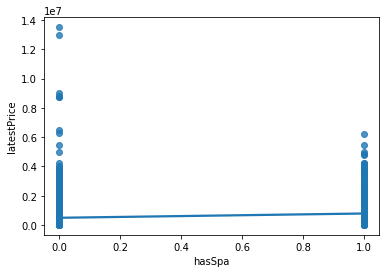

In [495]:
sns.regplot(data=df, x='hasSpa', y='latestPrice');

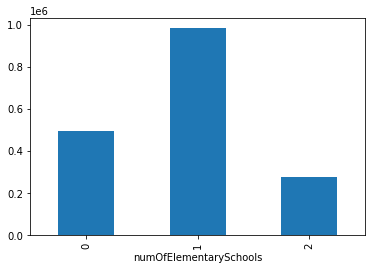

In [501]:
# with numOfElementarySchools
df.groupby('numOfElementarySchools')['latestPrice'].mean().plot(kind='bar');

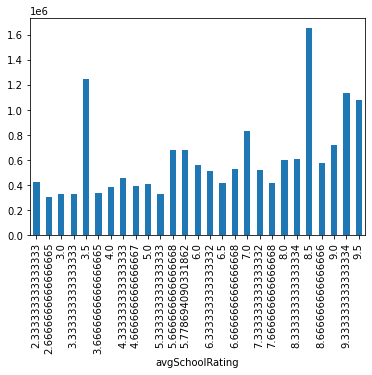

In [45]:
# with avgSchoolDistance
df.groupby('avgSchoolRating')['latestPrice'].mean().plot(kind='bar');

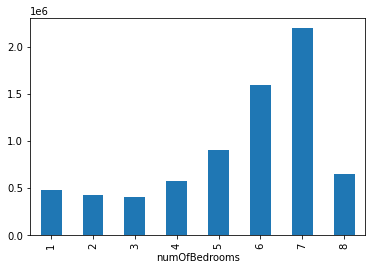

In [46]:
# Average price with number of bedrooms
df.groupby('numOfBedrooms')['latestPrice'].mean().plot(kind='bar');

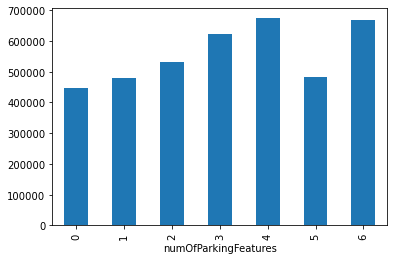

In [47]:
# with number of parking features
df.groupby('numOfParkingFeatures')['latestPrice'].mean().plot(kind='bar');

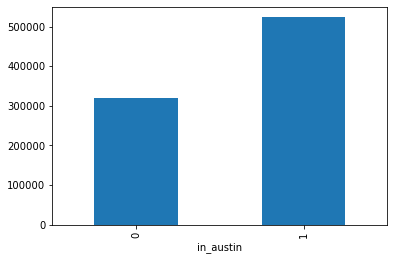

In [48]:
# whether listing is in Austin or not
df.groupby('in_austin')['latestPrice'].mean().plot(kind='bar');

most of features for number of schools don't have a meaningful relationship with price and in some instances like number of primary schools is in fact opposit which is counterintuitive. We'll be adding them up and see if that'll change. If stays opposit, we won't use that as a feature.

In [50]:
# new column for total number of schools
df['numOfSchoolsTotal'] = df['numOfElementarySchools']+df['numOfPrimarySchools']+df['numOfMiddleSchools']+df['numOfHighSchools']

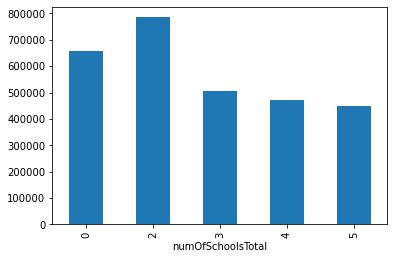

In [11]:
df.groupby('numOfSchoolsTotal')['latestPrice'].mean().plot(kind='bar');

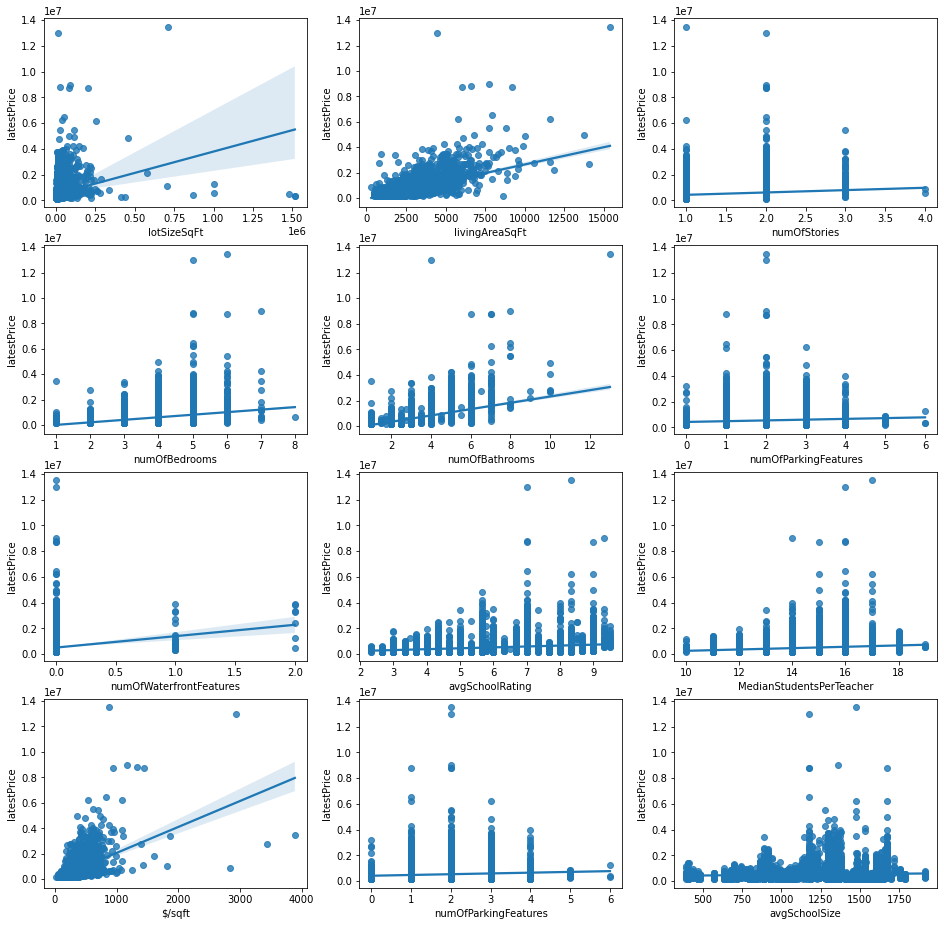

In [94]:
# Some of the other features with most correlation with price
fig, ax = plt.subplots(4, 3, figsize=(16, 16))

sns.regplot(data=df, x='lotSizeSqFt', y='latestPrice', ax=ax[0][0])
sns.regplot(data=df, x='livingAreaSqFt', y='latestPrice', ax=ax[0][1])
sns.regplot(data=df, x='numOfStories', y='latestPrice', ax=ax[0][2])
sns.regplot(data=df, x='numOfBedrooms', y='latestPrice', ax=ax[1][0])
sns.regplot(data=df, x='numOfBathrooms', y='latestPrice', ax=ax[1][1])
sns.regplot(data=df, x='numOfParkingFeatures', y='latestPrice', ax=ax[1][2])
sns.regplot(data=df, x='numOfWaterfrontFeatures', y='latestPrice', ax=ax[2][0])
sns.regplot(data=df, x='avgSchoolRating', y='latestPrice', ax=ax[2][1])
sns.regplot(data=df, x='MedianStudentsPerTeacher', y='latestPrice', ax=ax[2][2])
sns.regplot(data=df, x='numOfSchoolsTotal', y='latestPrice', ax=ax[3][0])
sns.regplot(data=df, x='numOfParkingFeatures', y='latestPrice', ax=ax[3][1])
sns.regplot(data=df, x='avgSchoolSize', y='latestPrice', ax=ax[3][2]);

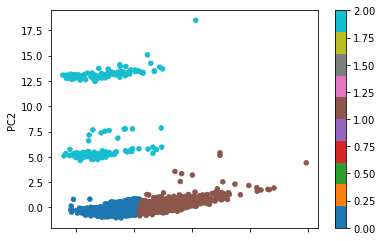

In [82]:
# PCA & KMEANS to see if there are meaningful clusters
features = ['hasCooling', 'hasHeating', 'hasSpa', 'hasView', 'numOfParkingFeatures', 'numOfWaterfrontFeatures', 'in_austin',
            'lotSizeSqFt', 'livingAreaSqFt', 'numOfBathrooms', 'numOfBedrooms', 'numOfStories', '$/sqft', 'buildingAge',
            'avgSchoolRating', 'MedianStudentsPerTeacher']

X= df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = KMeans(3, random_state=1)
clusters = model.fit_predict(X_scaled)

pca = PCA(2)
X_pca = pca.fit_transform(X_scaled)

pd.DataFrame(X_pca, columns=['PC1', 'PC2']).plot(kind='scatter',
                                                 x='PC1',
                                                 y='PC2',
                                                 c=clusters,
                                                 colormap='tab10');

# We do have distinctive clusters & some outliers(we do know some listings have unusually big lots & there is a big range in price)
# we'll attempt to get rid of outliers during modeling using Isolation Forest.

#ref: https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

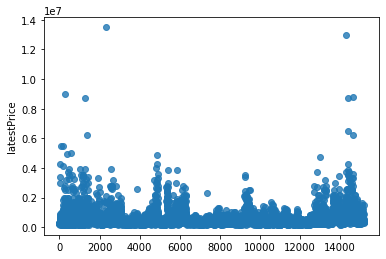

In [98]:
sns.regplot(data=df, x=df.index, y='latestPrice');

In [105]:
pd.set_option('display.float_format', lambda x: f'{x:,.3f}')
df['latestPrice'].describe()

count       14,016.000
mean       521,594.336
std        447,802.513
min        150,000.000
25%        315,000.000
50%        413,950.000
75%        579,000.000
max     13,500,000.000
Name: latestPrice, dtype: float64

# 3. Model
## Feature & label selection

In [67]:
# zipcode & numOfSchools
features = ['hasCooling', 'hasHeating', 'hasSpa', 'hasView', 'numOfParkingFeatures', 'numOfWaterfrontFeatures', 'in_austin',
            'lotSizeSqFt', 'livingAreaSqFt', 'numOfBathrooms', 'numOfBedrooms', 'numOfStories', 'buildingAge', 'zipcode',
            'avgSchoolRating', 'MedianStudentsPerTeacher']

X= df[features]
y = df['latestPrice']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
print(X_train.shape, y_train.shape)

(11212, 16) (2804, 16) (11212,) (2804,)
(8409, 16) (8409,)


## Baseline Model
We'll try first without outlier isolation and then with:

In [68]:
# Quantile encoding for zipcode
qe = QuantileEncoder(cols='zipcode')
X_train_qe = qe.fit_transform(X_train, y_train)
X_val_qe = qe.transform(X_val)

# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_qe)
X_val_scaled = scaler.transform(X_val_qe)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_val_scaled)
y_pred_lr = lr.predict(X_val_scaled)

r2_lr = r2_score(y_val, y_pred_lr)
r2_rf = r2_score(y_val, y_pred_rf)
mae = mean_absolute_error(y_val, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_val, y_pred_rf))

print('Linear Regression model:')
print('R2 = %.3f' % r2_lr)

print('Random Forest model:')
print('R2 = %.3f' % r2_rf)
print('MAE = %.3f' % mae)
print('RMSE = %.3f' % rmse)

Linear Regression model:
R2 = 0.629
Random Forest model:
R2 = 0.741
MAE = 96944.842
RMSE = 224359.301


In [64]:
print(X_train.shape, y_train.shape)
# Quantile encoding for zipcode
qe = QuantileEncoder(cols='zipcode')
X_train_qe = qe.fit_transform(X_train, y_train)
X_val_qe = qe.transform(X_val)

# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_qe)
X_val_scaled = scaler.transform(X_val_qe)

# identifing outliers in the training dataset
iso = IsolationForest(contamination=0.05)
y_iso = iso.fit_predict(X_train_scaled)
# select all rows that are not outliers
mask = y_iso != -1
X_train_scaled, y_train = X_train_scaled[mask, :], y_train[mask]
print(X_train_scaled.shape, y_train.shape)

# lr = LinearRegression()
# lr.fit(X_train_scaled, y_train)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_val_scaled)
# y_pred = lr.predict(X_val_scaled)

r2 = r2_score(y_val, y_pred)

mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print('R2 = %.3f' % r2)
print('MAE = %.3f' % mae)
print('RMSE = %.3f' % rmse)

(8409, 16) (8409,)
(7988, 16) (7988,)
R2 = 0.593
MAE = 101887.085
RMSE = 281426.045


The preformance with both linear regression and random forest doesn't improve after applying isolationn forest(even with a very small contamination rate), perhaps due to the high number of rows we lose or that what was removed wasn't essentially an outlier(e.g. listings with big lots that we still need to predict for in our X_test but we're forcing model not to look at them. 

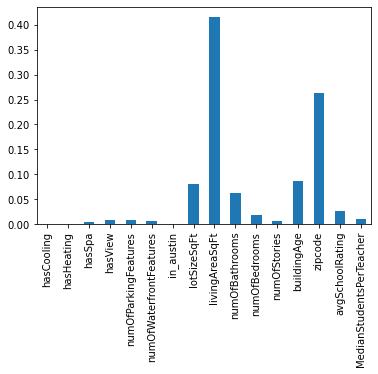

In [69]:
# getting feature importance by first rerunning the basemodel without Isolation Forest
pd.Series(rf.feature_importances_, index=X_train.columns).plot(kind='bar');

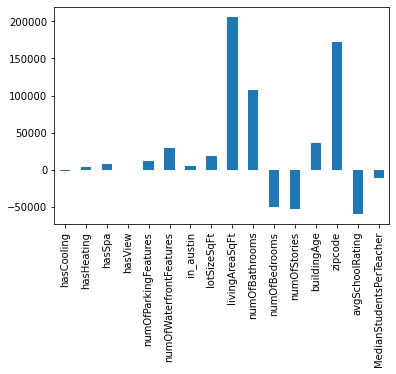

In [70]:
pd.Series(lr.coef_, index=X_train.columns).plot(kind='bar');

## Feature Engineering
First let's make a function to calculate R2 and RMSE each time we add/remove feature:

In [71]:
def RF_r2_rmse_scores(features_list):
    
    X= df[features_list]
    y = df['latestPrice']

    X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

    qe = QuantileEncoder(cols='zipcode')
    X_train_qe = qe.fit_transform(X_train, y_train)
    X_val_qe = qe.transform(X_val)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_qe)
    X_val_scaled = scaler.transform(X_val_qe)

    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train_scaled, y_train)

    y_pred = rf.predict(X_val_scaled)

    r2 = r2_score(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))

    print('R2 = %.3f' % r2)
    print('RMSE = %.3f' % rmse)

In [72]:
# Adding a new column for price per sq.ft
df['$/sqft'] = df['latestPrice'] / df['livingAreaSqFt']

# Binning to differentiate between the age of buildings(boundaries based on mls, labels are numerical, newer building, higher #)
bin_boundary = [0, 5, 15, 30, 50, 99, 200]
bin_label = [5, 4, 3, 2, 1, 0]
df['age_binned'] = pd.cut(df['buildingAge'], bins=bin_boundary, labels=bin_label).astype(int)

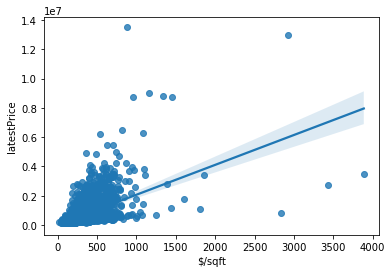

In [146]:
sns.regplot(data=df, x='$/sqft', y='latestPrice');

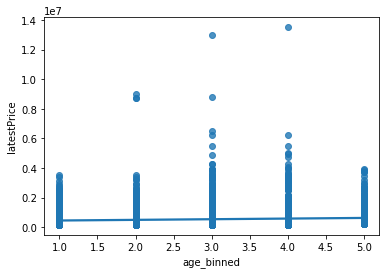

In [139]:
sns.regplot(data=df, x='age_binned', y='latestPrice');

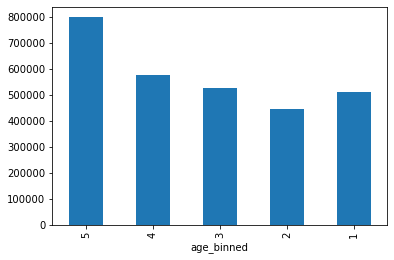

In [145]:
df.groupby('age_binned')['latestPrice'].mean().plot(kind='bar');

In [73]:
# How much $/sqft feature improve our model?(base model: R2 = 0.605)
features_list = ['hasCooling', 'hasHeating', 'hasSpa', 'hasView', 'numOfParkingFeatures', 'numOfWaterfrontFeatures', 'in_austin',
            'lotSizeSqFt', 'livingAreaSqFt', 'numOfBathrooms', 'numOfBedrooms', 'numOfStories', 'buildingAge', 'zipcode',
            'avgSchoolRating', 'MedianStudentsPerTeacher', '$/sqft']

RF_r2_rmse_scores(features_list)

R2 = 0.975
RMSE = 70057.982


In [74]:
# How much age_binned feature improve our model?(base model: R2 = 0.605)
features_list = ['hasCooling', 'hasHeating', 'hasSpa', 'hasView', 'numOfParkingFeatures', 'numOfWaterfrontFeatures', 'in_austin',
            'lotSizeSqFt', 'livingAreaSqFt', 'numOfBathrooms', 'numOfBedrooms', 'numOfStories', 'buildingAge', 'zipcode',
            'avgSchoolRating', 'MedianStudentsPerTeacher', 'age_binned']

RF_r2_rmse_scores(features_list)

R2 = 0.736
RMSE = 226500.019


In [75]:
# How much both features improve our model?(base model: R2 = 0.605)
features_list = ['hasCooling', 'hasHeating', 'hasSpa', 'hasView', 'numOfParkingFeatures', 'numOfWaterfrontFeatures', 'in_austin',
            'lotSizeSqFt', 'livingAreaSqFt', 'numOfBathrooms', 'numOfBedrooms', 'numOfStories', 'buildingAge', 'zipcode',
            'avgSchoolRating', 'MedianStudentsPerTeacher', 'age_binned', '$/sqft']

RF_r2_rmse_scores(features_list)

R2 = 0.977
RMSE = 66363.478


#### We've achieved a good R2 score. We can make a pipeline and try other algorithms to see if they yield a similar score

In [76]:
features = ['hasCooling', 'hasHeating', 'hasSpa', 'hasView', 'numOfParkingFeatures', 'numOfWaterfrontFeatures', 'in_austin',
            'lotSizeSqFt', 'livingAreaSqFt', 'numOfBathrooms', 'numOfBedrooms', 'numOfStories', 'buildingAge', 'zipcode',
            'avgSchoolRating', 'MedianStudentsPerTeacher', 'age_binned', '$/sqft']

X= df[features]
y = df['latestPrice']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape)

(11212, 18) (2804, 18) (11212,) (2804,)


In [77]:
# Random Forest
qe = QuantileEncoder(cols='zipcode')
scaler = StandardScaler()
rf = RandomForestRegressor(random_state=42)

steps = [('quantile_encode', qe), ('standard_scaler', scaler), ('random_forest', rf)]

pipeline = Pipeline(steps=steps)

scores = cross_val_score(pipeline, X_train_full, y_train_full, cv=5, scoring='r2', n_jobs=-1)
print(scores.mean())
scores

0.9418872758027828


array([0.95895722, 0.97078145, 0.99168935, 0.95929022, 0.82871814])

In [78]:
# SGDRegressor with Ridge/L2
qe = QuantileEncoder(cols='zipcode')
scaler = StandardScaler()
sgdL2 = SGDRegressor(penalty='l2')

steps = [('quantile_encode', qe), ('standard_scaler', scaler), ('ridge_regressor', sgdL2)]

pipeline = Pipeline(steps=steps)

scores = cross_val_score(pipeline, X_train_full, y_train_full, cv=5, scoring='r2', n_jobs=-1)
print(scores.mean())
scores

0.8193835412641917


array([0.86565561, 0.78173824, 0.86139255, 0.76455586, 0.82357544])

In [79]:
# SGDRegressor with Lasso/L1
qe = QuantileEncoder(cols='zipcode')
scaler = StandardScaler()
sgdL1 = SGDRegressor(penalty='l1')

steps = [('quantile_encode', qe), ('standard_scaler', scaler), ('lasso_regressor', sgdL1)]

pipeline = Pipeline(steps=steps)

scores = cross_val_score(pipeline, X_train_full, y_train_full, cv=5, scoring='r2', n_jobs=-1)
print(scores.mean())
scores

0.7908390201274014


array([0.8549398 , 0.70857845, 0.85844576, 0.75336572, 0.77886537])

In [80]:
# XGBoost
qe = QuantileEncoder(cols='zipcode')
scaler = StandardScaler()
xgb = XGBRegressor(n_jobs=-1)

steps = [('quantile_encode', qe), ('standard_scaler', scaler), ('xgboost', xgb)]

pipeline = Pipeline(steps=steps)

scores = cross_val_score(pipeline, X_train_full, y_train_full, cv=5, scoring='r2', n_jobs=-1)
print(scores.mean())
scores

0.9283017094279205


array([0.95761499, 0.92037444, 0.99084286, 0.91177648, 0.86089977])

## Model Tuning
We'll go forward using random forest.

In [93]:
features = ['hasCooling', 'hasHeating', 'hasSpa', 'hasView', 'numOfParkingFeatures', 'numOfWaterfrontFeatures', 'in_austin',
            'lotSizeSqFt', 'livingAreaSqFt', 'numOfBathrooms', 'numOfBedrooms', 'numOfStories', 'buildingAge', 'zipcode',
            'avgSchoolRating', 'MedianStudentsPerTeacher', 'age_binned', '$/sqft']

X= df[features]
y = df['latestPrice']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [88]:
qe = QuantileEncoder(cols='zipcode')
X_train_qe = qe.fit_transform(X_train, y_train)
X_val_qe = qe.transform(X_val)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_qe)
X_val_scaled = scaler.transform(X_val_qe)

rf_model = RandomForestRegressor(random_state=42)

parameters = {
    'n_estimators' : [100,200,300,400],
    'max_depth': [20,50,100],
    'max_features': ["auto", "sqrt"],
    'min_samples_split': [5,10,15],
    'min_samples_leaf': [2,4,6]
}

gs_rf = GridSearchCV(estimator=rf_model, param_grid=parameters, cv=5, scoring='r2', n_jobs=-1, verbose=2)
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [20, 50, 100],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='r2', verbose=2)

In [89]:
best_model = gs_rf.best_estimator_
best_model

RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=200, random_state=42)

In [95]:
# let's see how this will perform on our X_val
best_model.fit(X_train_scaled, y_train)
y_pred_gs = best_model.predict(X_val_scaled)

r2 = r2_score(y_val, y_pred_gs)
rmse = np.sqrt(mean_squared_error(y_val, y_pred_gs))

print('R2 = %.3f' % r2)
print('RMSE = %.3f' % rmse)

R2 = 0.916
RMSE = 127583.030


In [96]:
# Now let's fit on the full training set & predict on X_test to report our final number
qe = QuantileEncoder(cols='zipcode')
X_train_qe = qe.fit_transform(X_train_full, y_train_full)
X_test_qe = qe.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_qe)
X_test_scaled = scaler.transform(X_test_qe)

best_model.fit(X_train_scaled, y_train_full)
y_pred = best_model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('R2 = %.3f' % r2)
print('RMSE = %.3f' % rmse)

R2 = 0.835
RMSE = 196007.927


## Model Interpretation

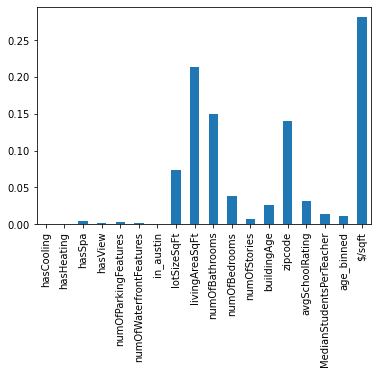

In [98]:
pd.Series(best_model.feature_importances_, index=X_train_full.columns).plot(kind='bar');
# As saw during feature engineering, the new feature of $/sqft contributed greatly to model improvement and we can see here that
# it is the most important feature along with main characteristics of the house:
#lot size, living area, zipcode, number of bedrooms & bathrooms